<a href="https://colab.research.google.com/github/JH22222/DAP__/blob/main/DAP_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

## [Get the Data](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/version/1?select=master.csv)

---
1985년 ~ 2016년 자살 개요
연도별, 국가별 자살과 사회경제적 정보를 비교.

국가, 연도, 성별, 연령 그룹, 자살 수, 인구, 자살률, 국가 연도 복합 키, 연도별 HDI(행복지수), 연간 GDP, 1인당 GDP, 세대(연령 그룹 평균 기준).

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/JH22222/toSubmission/main/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## 한국의 지표들 추출

In [23]:
kor = (df.country == 'Republic of Korea')
df_kor = df[kor]
df_kor

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20230,Republic of Korea,1985,male,75+ years,42,154800,27.13,Republic of Korea1985,NaN,"100,273,097,170",2731,G.I. Generation
20231,Republic of Korea,1985,male,55-74 years,393,1498300,26.23,Republic of Korea1985,NaN,"100,273,097,170",2731,G.I. Generation
20232,Republic of Korea,1985,male,35-54 years,903,4285700,21.07,Republic of Korea1985,NaN,"100,273,097,170",2731,Silent
20233,Republic of Korea,1985,male,25-34 years,655,3616800,18.11,Republic of Korea1985,NaN,"100,273,097,170",2731,Boomers
20234,Republic of Korea,1985,male,15-24 years,678,4413000,15.36,Republic of Korea1985,NaN,"100,273,097,170",2731,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
20597,Republic of Korea,2015,female,35-54 years,1372,8337331,16.46,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Generation X
20598,Republic of Korea,2015,male,15-24 years,421,3580725,11.76,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Millenials
20599,Republic of Korea,2015,female,15-24 years,256,3211732,7.97,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Millenials
20600,Republic of Korea,2015,male,5-14 years,17,2523952,0.67,Republic of Korea2015,NaN,"1,382,764,027,114",28410,Generation Z


간단하게 75세 이상 남성들의 자살 현황을 그래프로 그려보았다. 


In [24]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


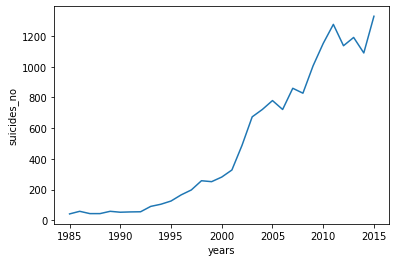

In [27]:
condition = (df.sex == 'male') & (df.age == '75+ years')
df_kor_y75 = df_kor[condition]
plt.plot(df_kor_y75.year, df_kor_y75.suicides_no)
plt.xlabel('years')
plt.ylabel('suicides_no')
plt.show()

전체적으로 자살률이 연도가 증가함에따라 같이 증가하는 경향을 보였다. 하지만 여기서 인구 수 증가를 생각하지 않을 수 없다. 그래서 인구 수 증가에 따른 자살률을 그려볼 수 있었다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


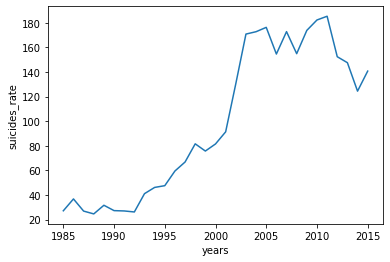

In [33]:
condition = (df.sex == 'male') & (df.age == '75+ years')
df_kor.rename(columns={'suicides/100k pop' : 'suicides_rate'})
df_kor_y75 = df_kor[condition]
plt.plot(df_kor_y75.year, df_kor_y75.suicides_rate)
plt.xlabel('years')
plt.ylabel('suicides_rate')
plt.show()

2000년대 초반에 급격하게 자살률이 높아진 것을 확인할 수 잇지만, 그 이후 자살률은 유지가되다, 2010년대에 들어서자 감소하는 추세를 확인할 수 있다. 따라서 2010년대를 기준으로 75세 이상의 남성 자살률은 증가하다가 감소하는 추세라고 말할 수 있다.